In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import matplotlib.dates as dts
import numpy as np
import pandas as pd
import itertools
import os
import ROOT
import datetime
from root_numpy import root2array, root2rec, tree2rec, array2root
from scipy.optimize import curve_fit
from scipy.misc import factorial
plt.rcParams.update({'font.size': 16})

In [2]:
from decode import GetWaveformsNoiseRemoval

In [3]:
from datetime import datetime

In [4]:
def gettime(name):
    date = name.split('PrM1-')[-1].split('.dat')[0]
    time = datetime.strptime(date,'%Y_%m_%d-%H_%M_%S')
    return time

In [5]:
def QaQc(wf_v):
    anode_v = wf_v[0][700:]
    cathode_v = wf_v[1][500:]
    Qa = np.amax(anode_v)
    Qc = np.amin(cathode_v)
    return Qa,Qc

def QaQcSTATS(ev_wf_v):
    
    Qa_v = []
    Qc_v = []
    for wf_v in ev_wf_v:
        Qa,Qc = QaQc(wf_v)
        Qa_v.append(Qa*1e3)
        Qc_v.append(Qc*1e3)
    Qa_v = np.array(Qa_v)
    Qc_v = np.array(Qc_v)

    Qa_avg = np.mean(Qa_v)
    Qa_rms = np.std(Qa_v)
    Qc_avg = np.mean(Qc_v)
    Qc_rms = np.std(Qc_v)
    
    return [[Qa_avg,Qa_rms],[Qc_avg,Qc_rms]]

In [6]:
PATH = '/home/david/Dropbox/Neutrinos/LArCADe/Run1/'
datafile_v = os.listdir(PATH)
dt = 0.0005

In [7]:
datafile = PATH + datafile_v[0]
ev_wf_v = GetWaveformsNoiseRemoval(datafile)

decode.py:35: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1501 but corresponding boolean dimension is 3000
  wf_a_freq_signl[(freq_v > 30)] = 0
decode.py:36: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1501 but corresponding boolean dimension is 3000
  wf_c_freq_signl[(freq_v > 30)] = 0


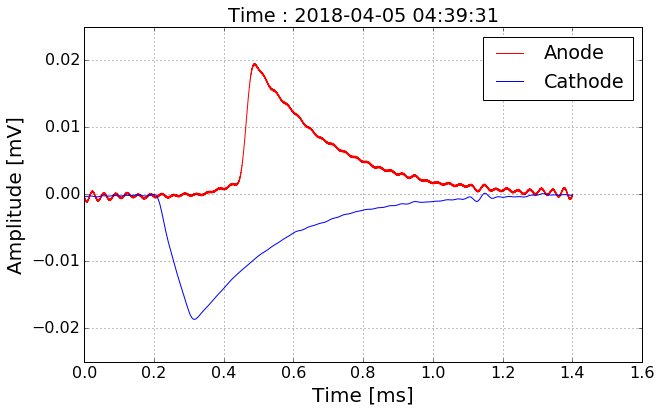

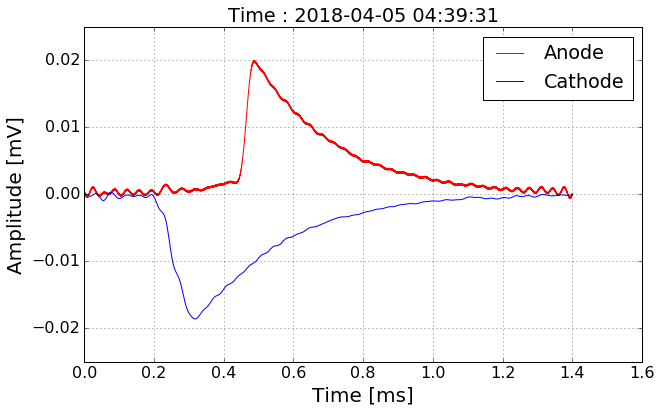

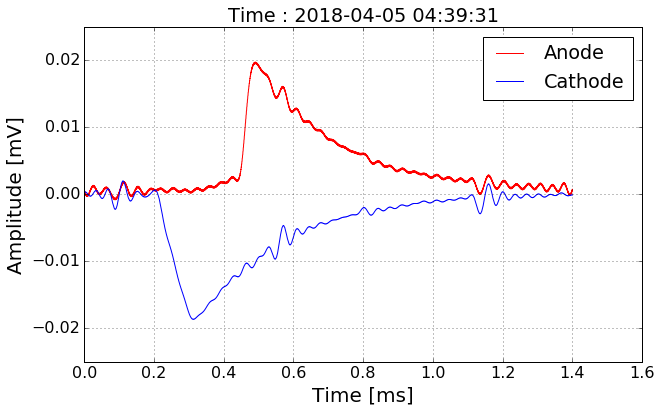

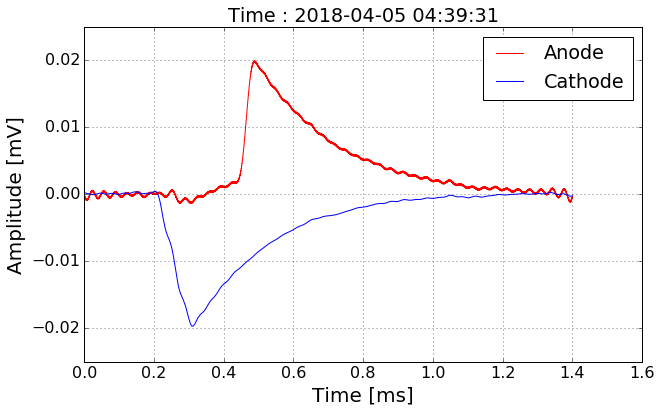

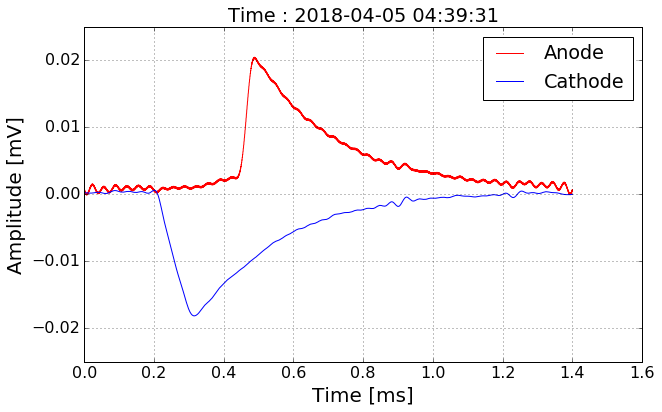

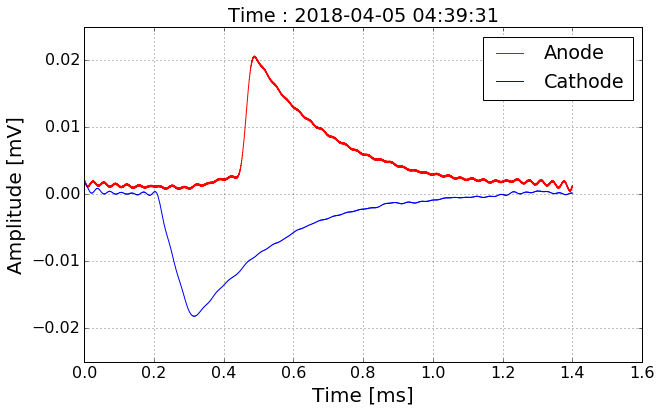

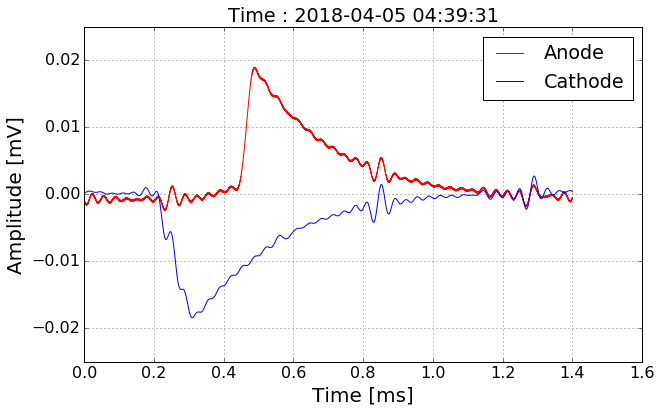

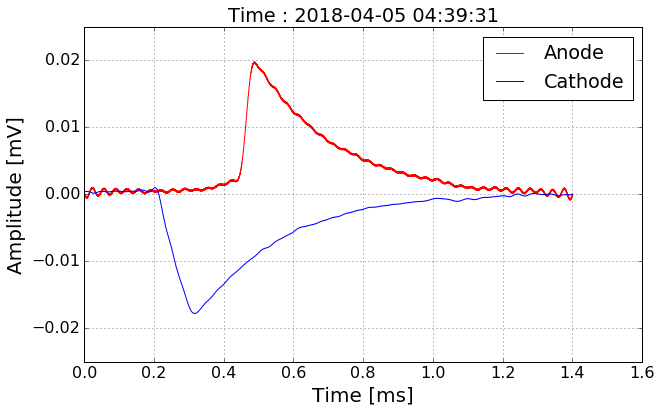

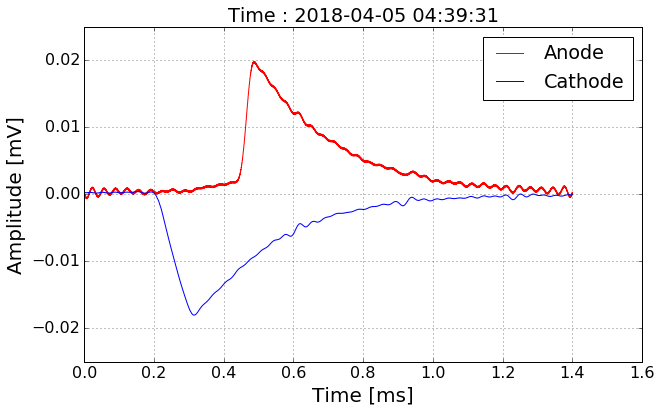

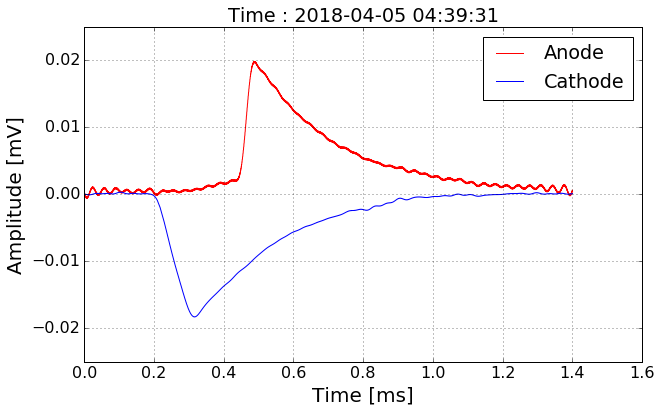

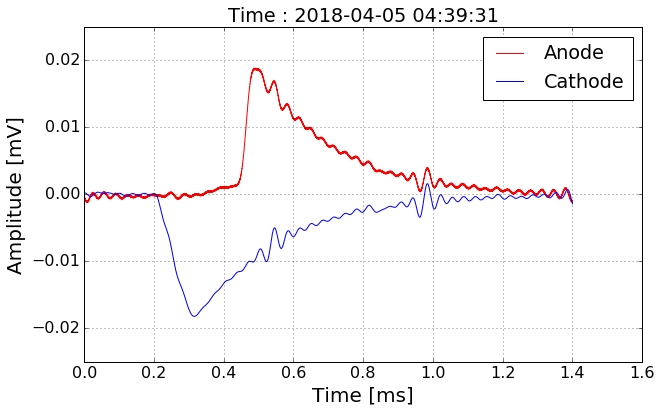

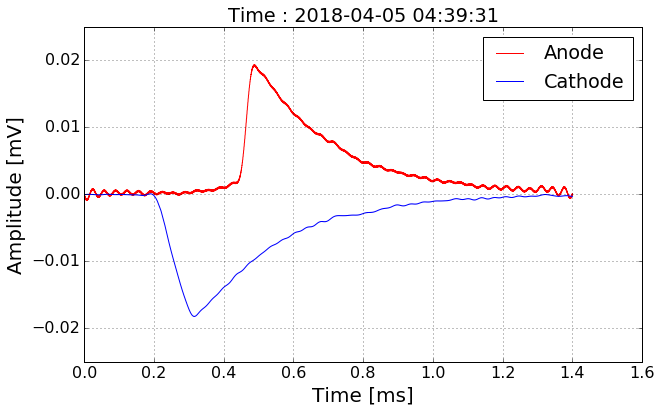

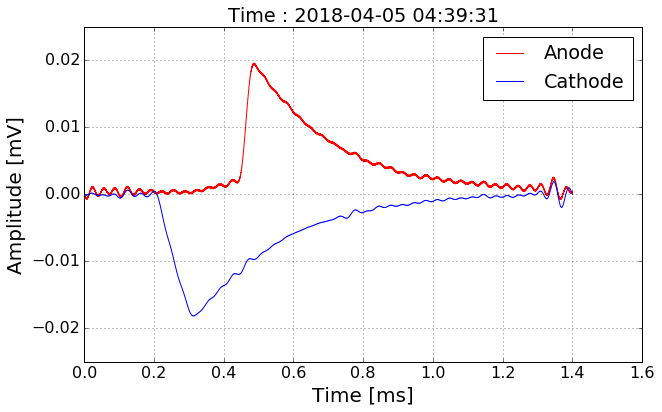

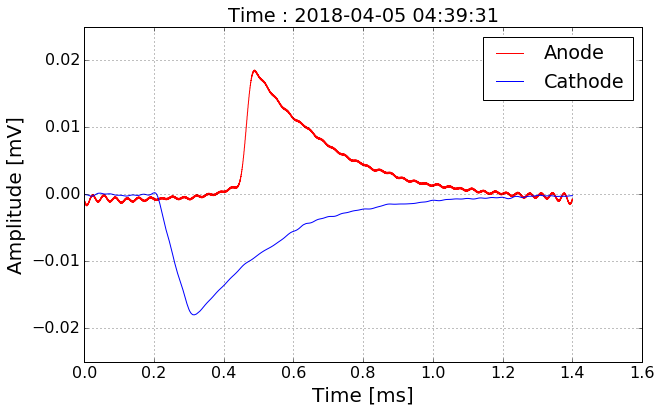

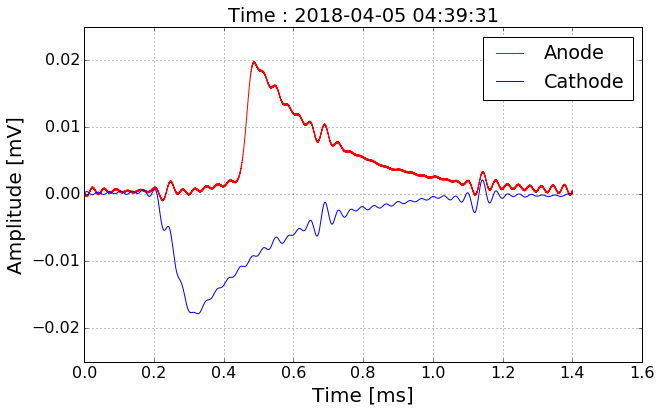

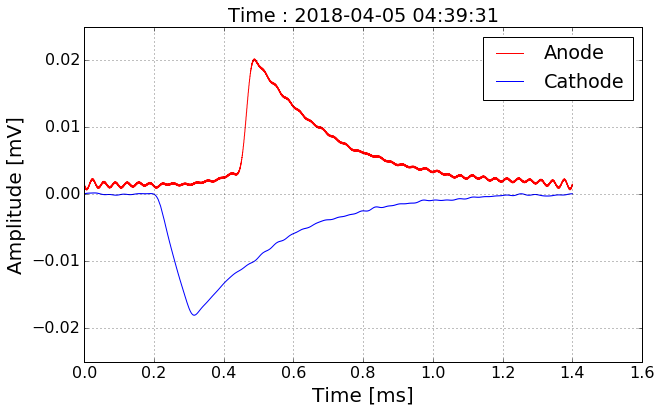

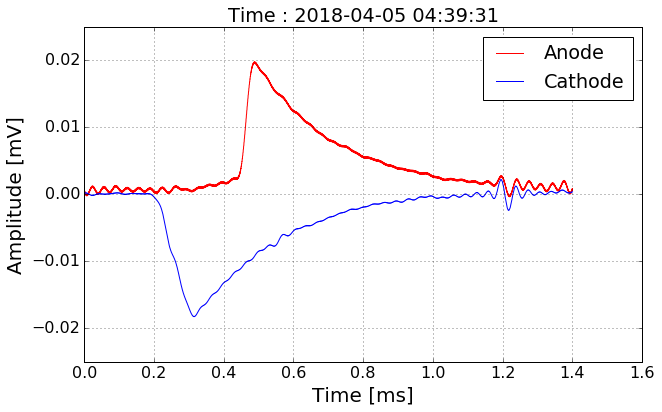

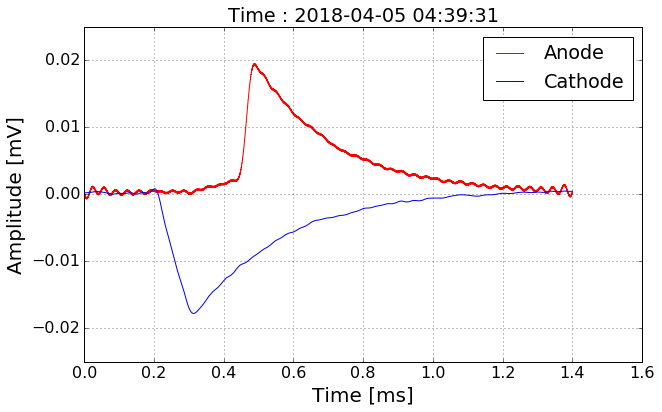

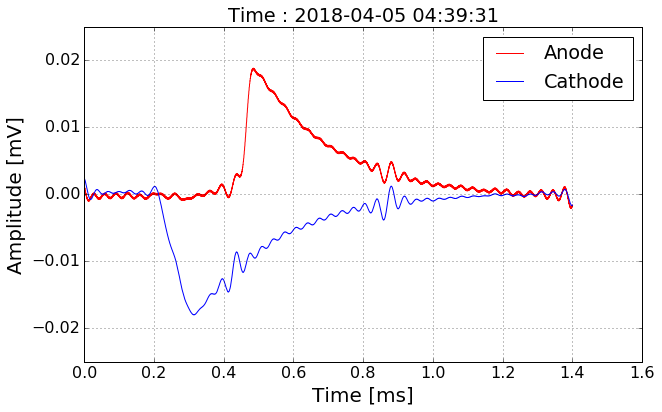

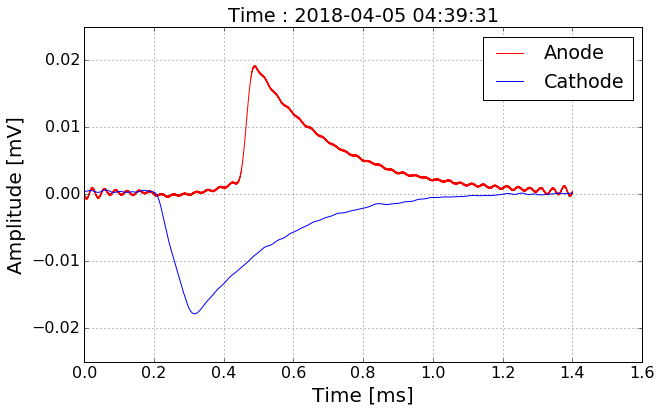

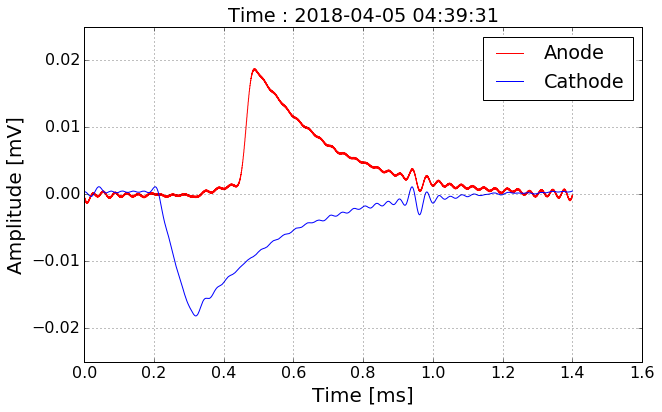

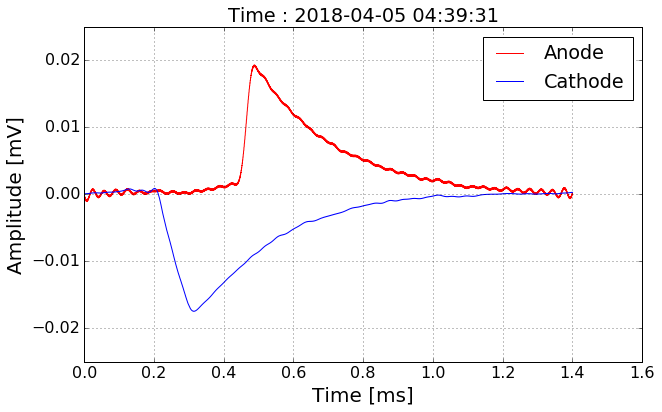

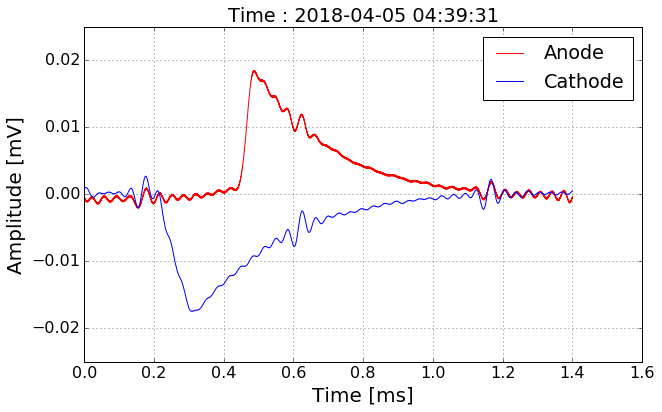

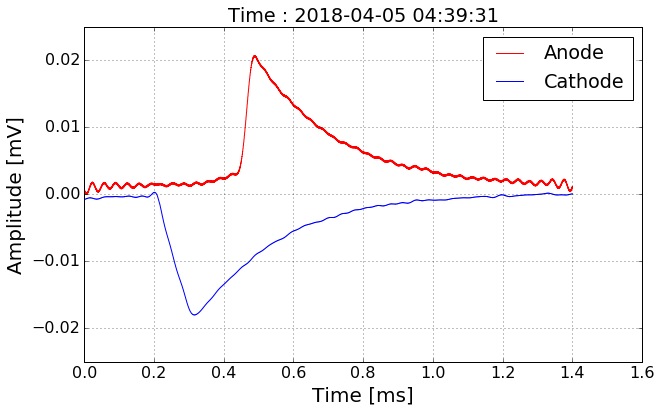

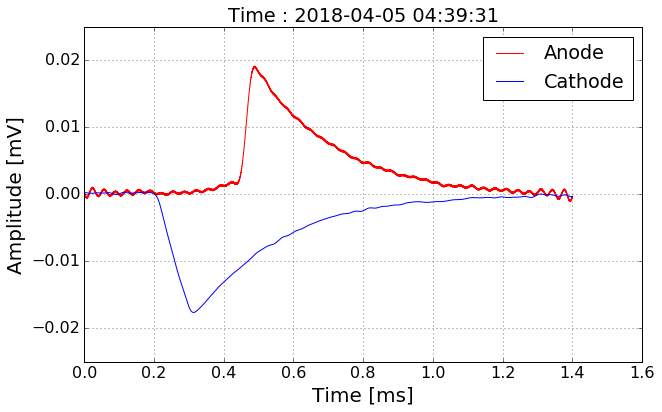

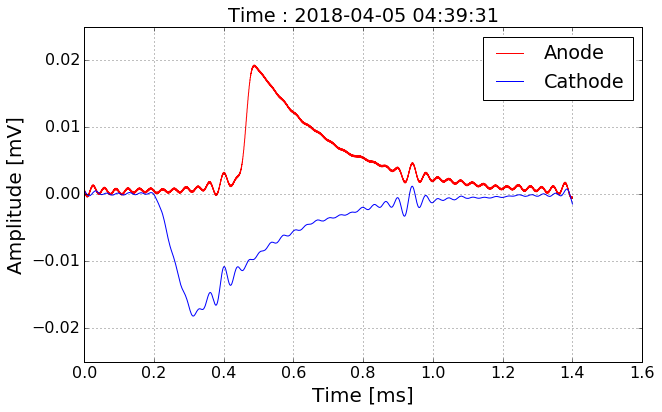

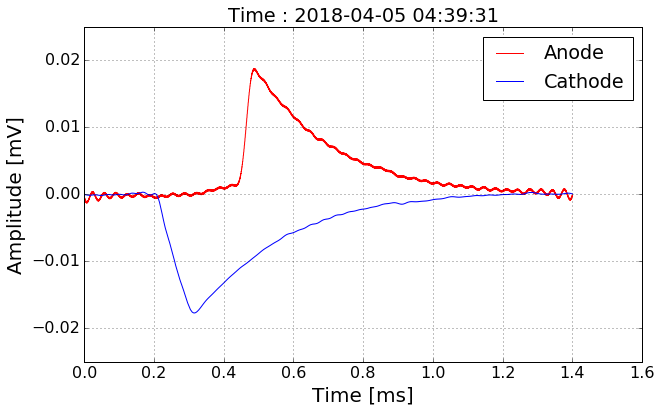

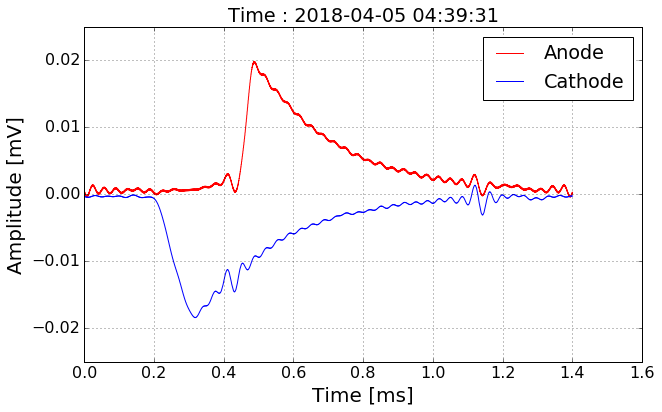

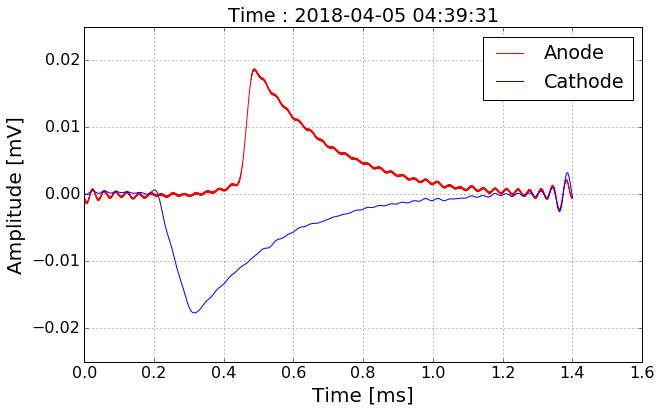

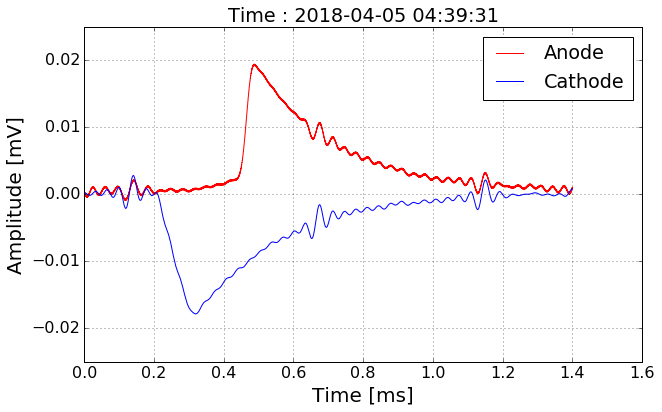

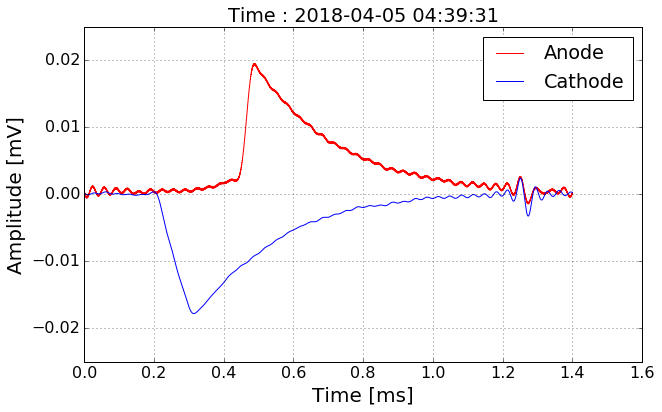

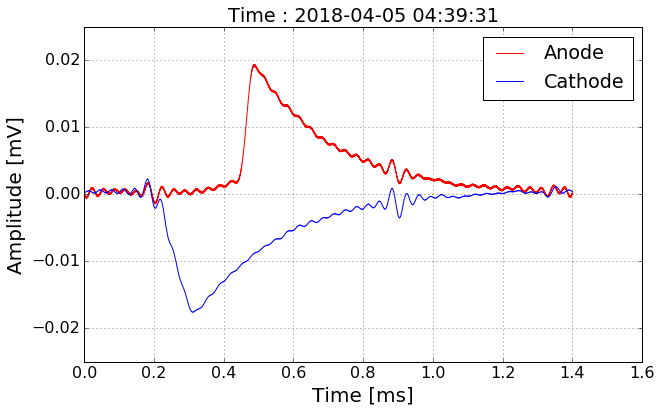

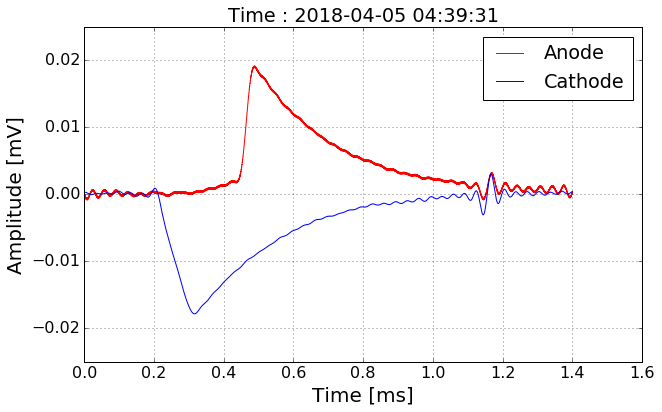

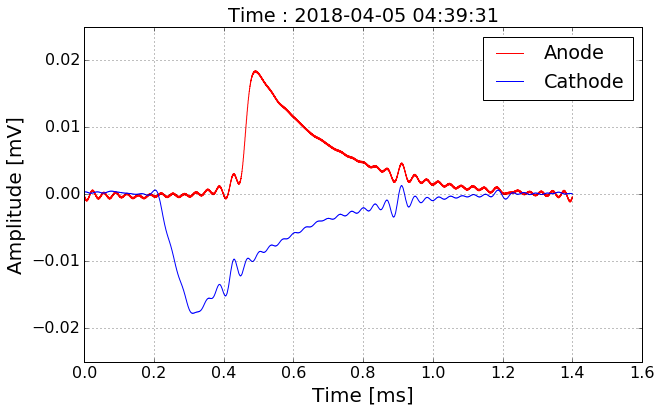

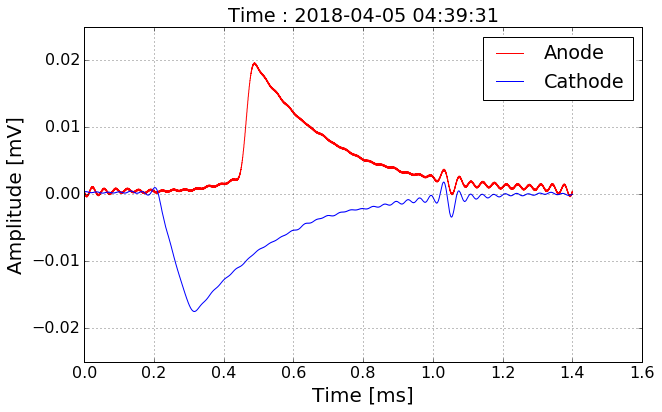

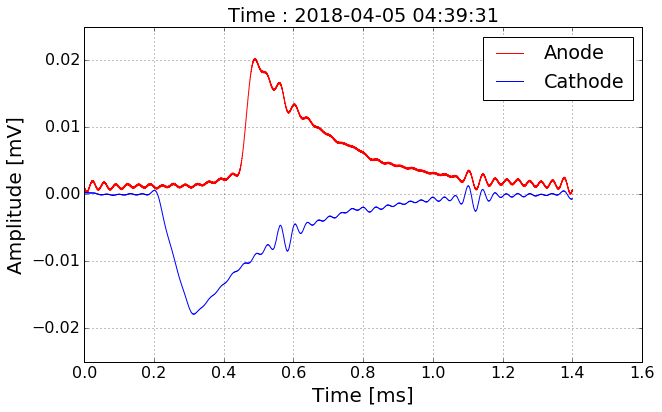

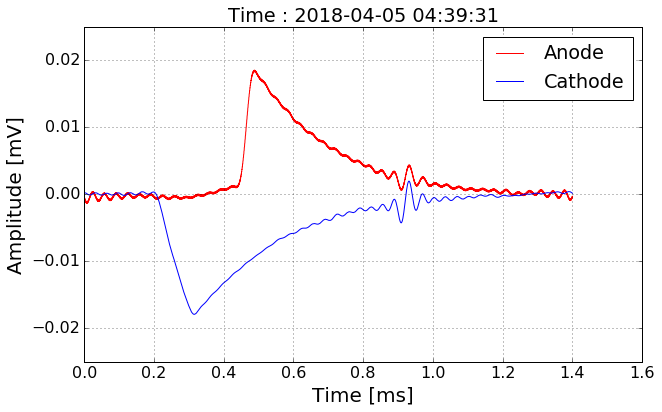

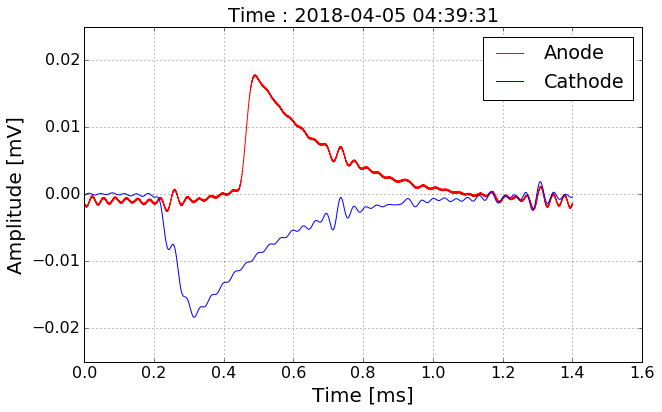

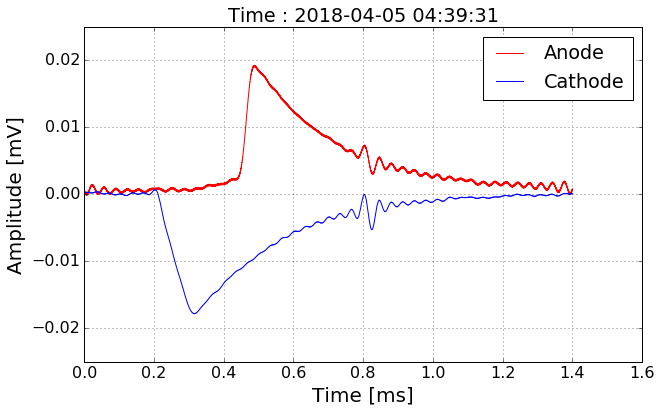

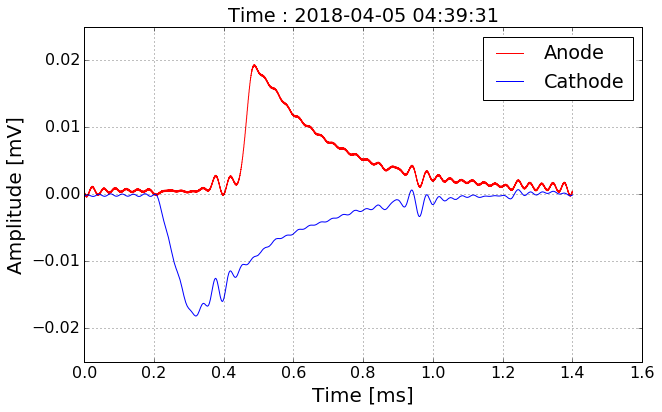

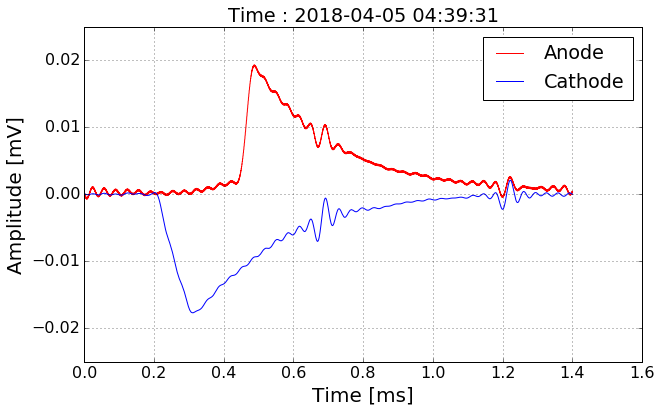

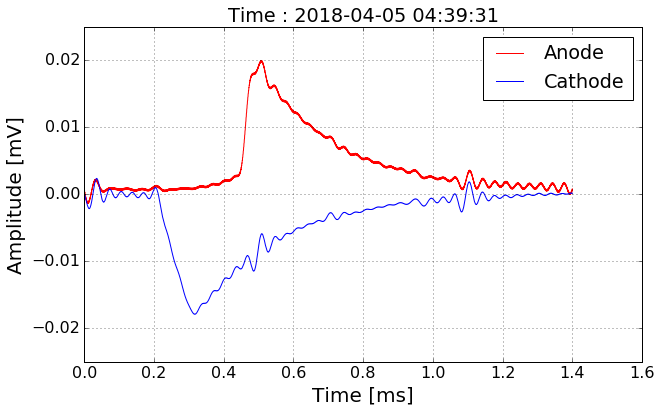

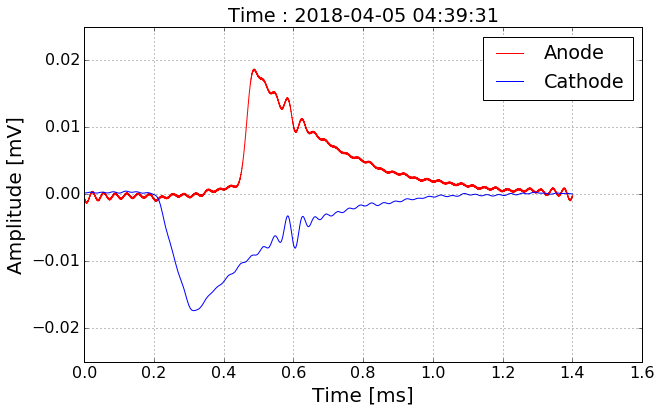

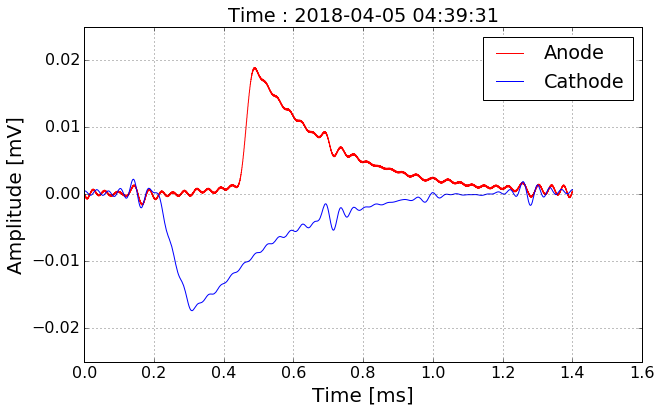

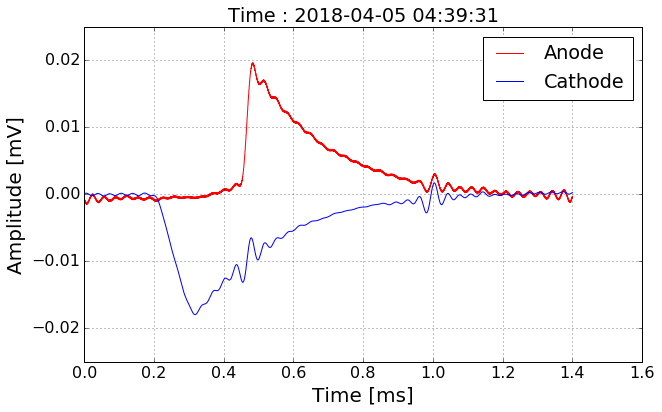

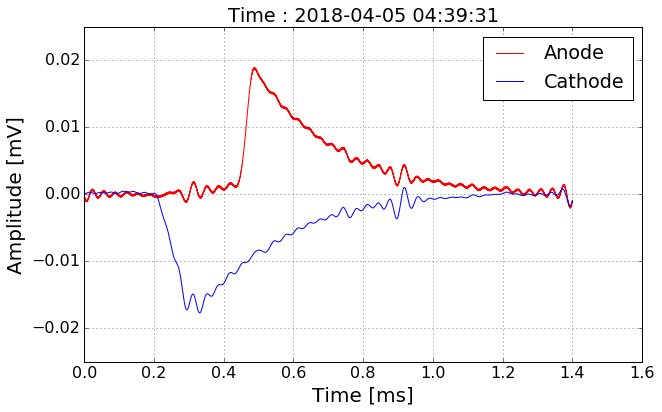

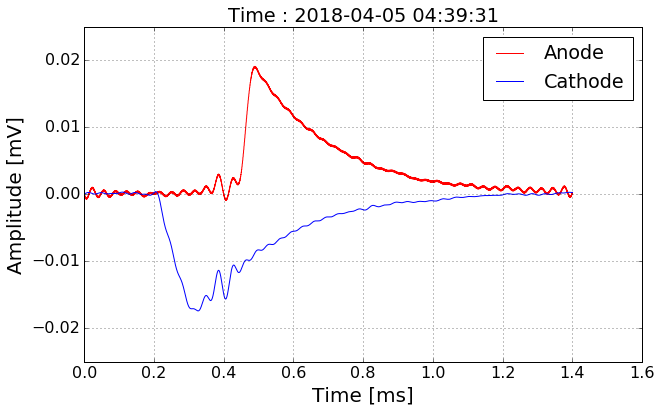

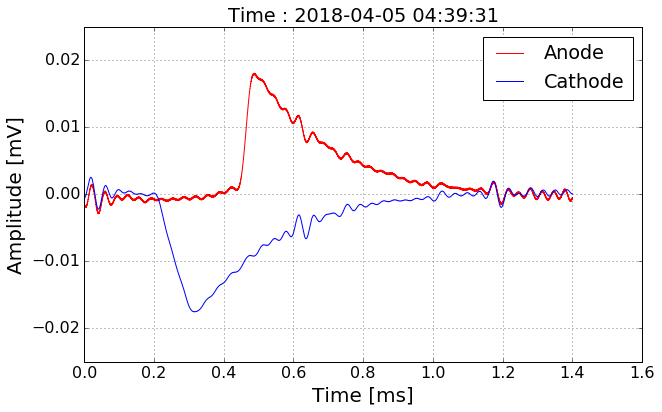

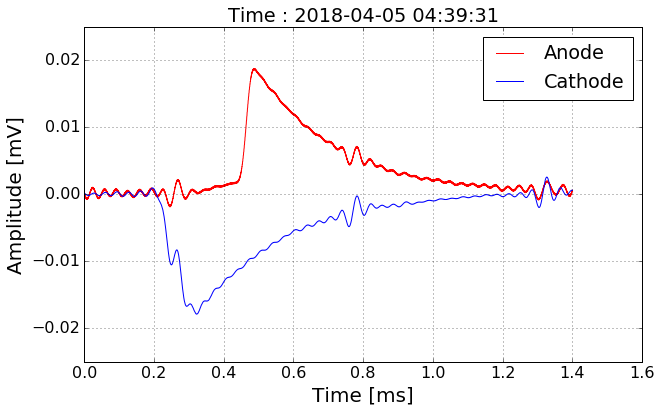

In [8]:
time = gettime(datafile_v[0])
dt = 0.0005

time_v = np.linspace(0,dt*len(ev_wf_v[0][0]),len(ev_wf_v[0][0]))

for n in xrange(len(ev_wf_v)):

    fig = plt.figure(figsize=(10,6))
    plt.plot(time_v,ev_wf_v[n][0],color='r',label='Anode')
    plt.plot(time_v,ev_wf_v[n][1],color='b',label='Cathode')
    plt.grid()
    plt.legend(loc=1)
    plt.xlabel('Time [ms]',fontsize=20)
    plt.ylabel('Amplitude [mV]',fontsize=20)
    plt.title('Time : %s'%time)
    plt.ylim([-0.025,0.025])
    #plt.xlim([0,0.05])
    plt.show()

In [ ]:
date_v = []
Qa_avg_v = []
Qa_rms_v = []
Qc_avg_v = []
Qc_rms_v = []

for datafile in datafile_v:
    if (datafile.find('.dat') < 0): continue
    time = gettime(datafile)
    fin = PATH+datafile
    try:
        ev_wf_v = GetWaveforms(fin)
        res = QaQcSTATS(ev_wf_v)
        Qa_avg = res[0][0]
        Qa_rms = res[0][1]
        Qc_avg = res[1][0]
        Qc_rms = res[1][1]
        print 'At %s Qa : %.02f +/- %.02f mV Qc : %.02f +/- %.02f mV'%(time,Qa_avg,Qa_rms,Qc_avg,Qc_rms)
        date_v.append(time)
        Qa_avg_v.append(Qa_avg)
        Qc_avg_v.append(Qc_avg)
        Qa_rms_v.append(Qa_rms)
        Qc_rms_v.append(Qc_rms)
    except:
        print 'failure @ file %s'%datafile
        
date_v = matplotlib.dates.date2num(date_v)

In [ ]:
fig = plt.figure(figsize=(16,6))

print len(date_v)
print len(Qa_avg_v)

#plt.plot_date(date_v,np.abs(Qa_avg_v))
#plt.plot_date(date_v,np.abs(Qc_avg_v))

plt.errorbar(date_v,np.abs(Qa_avg_v),yerr=Qa_rms_v,fmt='o',color='r',label='Anode')
plt.errorbar(date_v,np.abs(Qc_avg_v),yerr=Qc_rms_v,fmt='o',color='b',label='Cathode')

#plt.xlim([7.2e5,7.4e5])

plt.ylim([17,23])
plt.grid()
plt.legend(numpoints=1,fontsize=18)
plt.xlabel('Time [UNIX]',fontsize=20)
plt.ylabel('Amplitude [50-run avg.]',fontsize=20)
plt.show()